# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dog_ratings_df = pd.read_csv('twitter-archive-enhanced.csv')
dog_ratings_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Import requests & os modules
import requests
import os

In [4]:
# Define the url and use the requests.get method. <reponse [200]> : HTTP status code for the request has succeeded.
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [5]:
# Import predicted breeds file
img_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')
img_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Install tweepy package and import tweepy library
import tweepy

In [7]:
import json
from pprint import pprint
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [8]:
#Access to Twitter APIs with their approval APIs's Key and token

# access_token = "*"
# access_secret = "*"
# consumer_key = "*"
# consumer_secret = "*"

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = dog_ratings_df.tweet_id.values
# len(tweet_ids)

In [9]:
#Scrapping the Twiiter's WeRateDogs Archives for tweet_json.txt data
# count = 0
# fails_dict = {}
# start = timer()
# with open('tweet_json.txt', 'w') as outfile:
#         for tweet_id in tweet_ids:
#             count += 1
#             print(str(count) + ": " + str(tweet_id))
#             try:
#                 tweet = api.get_status(tweet_id, tweet_mode='extended')
#                 print("Success")
#                 json.dump(tweet._json, outfile)
#                 outfile.write('\n')
#             except Exception as e:
#                 print("Fail")
#                 fails_dict[tweet_id] = e
#                 pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
json_data = []
with open('tweet_json.txt') as file:
    for line in file:
        row = json.loads(line)
        json_data.append(row)
pprint(json_data[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                         'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                         'id': 892420639486877696,
                         'id_str': '892420639486877696',
                         'indices': [86, 109],
                         'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'sizes': {'large': {'h': 528,
                                             'resize': 'fit',
                                             'w': 540},
                                   'medium': {'h': 528,
                                              'resize': 'fit',
                                    

In [77]:
# create a dataframe from list of above list of dictionaries
tw_df = pd.DataFrame(json_data, columns=['id_str', 'retweet_count', 'favorite_count'])
#Re-name column `id_str` to `tweet_id`
tw_df = tw_df.rename(columns={'id_str': 'tweet_id'})
tw_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7053,33900
1,892177421306343426,5326,29399
2,891815181378084864,3503,22123
3,891689557279858688,7252,37004
4,891327558926688256,7801,35376


## Assessing Data

In [12]:
dog_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
dog_ratings_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeremy. He hasn't grown into his skin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None


In [14]:
dog_ratings_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
dog_ratings_df[dog_ratings_df['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [16]:
dog_ratings_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Frönq         1
Jessifer      1
Schnozz       1
Pluto         1
Odin          1
Name: name, Length: 957, dtype: int64

In [17]:
dog_ratings_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [18]:
dog_ratings_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
dog_ratings_df[dog_ratings_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Quality Issue**

`dog_ratings_df`
-	tweet_id: is a int64 not a string
-	timestamp: is string does not timestamp data type
-	name: missing name represented as ‘None’ or not reasonable naming (such as: a) will be converted into None. 
-	Rating_numerator columns: converted into float64 rather int64 and captured the decimals from text and replaced with correct ones.
-	Rating_denominator columns: converted into float64 rather int64.
-	-	There are some ratings are not extracted correctly from the tweet status. After investigating in the tweet status. Here are ones:

      o Index 1165: wrongly extracted from day format (4/20 – April 20) and it becomes numerator/denominator. It should be 13/10

      o	Index 2335: extracted 1/2 but correct is 9/10 after investigating in tweet’s text

      o	Index 1662: extracted 7/11 but correct is 10/10 after investigating in tweet’s text

      o	Index 1068: extracted 9/11 but correct is 14/10 after investigating in tweet’s text

      o	Index 784: extracted 9/11 but correct is 14/10 after investigating in tweet’s text

      o	Index 516: not relevant data in text 24/7 is not a rating. Will be removed 

      o	Index 342: not relevant data in text 11/15/15 is date format and the tweet_id is not matching into other datasets. Will be removed.
  
      o	Index 313: 960/00 is not valid. It’s a retweet. It should be dropped later. 
	
`img_pred_df`
-	tweet_id: is a int64 not a string
-	The p1, p2, p3 columns contain mixed upper/lower case words. It can be standardized into title and strip out “_” by “ “.

**Tidiness issue**

-	The dataframe includes all the tweets which are re-tweeted from the original ones. This could consider the duplicated rows for analysis; therefore, we will exclude these rows out the the dataframe. The columns `retweeted_xxx` non-null data is the one will be dropped out. 
-	The columns which are the stages of dog life: doggo, floofer, pupper, puppo are in the wide format. It will make many None rows which are not a good format. Therefore, we will combine these ones into one column called `dog_stage`
-	All three tables could be joined into one table by tweet_id.
-	Dropout non-related columns for later to be analyzed.  


In [22]:
# Make copies of original pieces of data
dog_ratings_df_clean = dog_ratings_df.copy()
img_pred_df_clean = img_pred_df.copy()
tw_df_clean = tw_df.copy()

### Quality Issue Define: 
`dog_ratings_df_clean`
-	tweet_id: is a int64 not a string
-	timestamp: is string not timestamp data type

#### Code

In [23]:
dog_ratings_df_clean['tweet_id'] = dog_ratings_df_clean['tweet_id'].astype(str)
dog_ratings_df_clean['timestamp'] = pd.to_datetime(dog_ratings_df_clean['timestamp'], format='%Y-%m-%d')

#### Test

In [24]:
dog_ratings_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [25]:
dog_ratings_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,None,None,None
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
606,798340744599797760,NaN,NaN,2016-11-15 01:44:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None


### Quality Issue Define: 
`img_pred_df_clean`
-	tweet_id: is a int64 not a string

### Code

In [26]:
img_pred_df_clean['tweet_id'] = img_pred_df_clean['tweet_id'].astype(str)

### Test

In [27]:
img_pred_df_clean.tweet_id.dtype

dtype('O')

### Tidiness Issue Define: 
- Drop re-tweet rows in which `retweeted_status_user_id` is not null
- Drop reply rows in which `inˍ_replyˍtoˍ_status_id` is not null

#### Code

In [31]:
dog_ratings_df_clean = dog_ratings_df_clean.query('retweeted_status_user_id != retweeted_status_user_id')
dog_ratings_df_clean = dog_ratings_df_clean.query('in_reply_to_status_id != in_reply_to_status_id')
dog_ratings_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,None,None,None
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None


#### Test

In [32]:
dog_ratings_df_clean[dog_ratings_df_clean['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
dog_ratings_df_clean[dog_ratings_df_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue Define: 
-	`name`: missing name represented as ‘None’ or not reasonable naming (such as: a) will be converted into None. 


In [34]:
#There are more wrong dog names start with lowercase characters.
dog_ratings_df_clean.query('name.str.contains("^[a-z]+").values').name.value_counts()

a               55
the              8
an               6
one              4
very             4
just             3
quite            3
actually         2
not              2
getting          2
this             1
incredibly       1
all              1
such             1
life             1
unacceptable     1
mad              1
light            1
space            1
infuriating      1
his              1
old              1
by               1
officially       1
my               1
Name: name, dtype: int64

#### Code

In [35]:
# Replace names start with lowercase character and convert them to 'None'
dog_ratings_df_clean['name'] = dog_ratings_df_clean.name.str.replace('(^[a-z]+)', 'None')

<ipython-input-35-be44edbecc0e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dog_ratings_df_clean['name'] = dog_ratings_df_clean.name.str.replace('(^[a-z]+)', 'None')


#### Test

In [36]:
dog_ratings_df_clean.query('name.str.contains("^[a-z]+").values').name.value_counts()

Series([], Name: name, dtype: int64)

In [37]:
dog_ratings_df_clean.name.value_counts()

None       707
Charlie     11
Lucy        11
Cooper      10
Oliver      10
          ... 
Herb         1
Sandra       1
Benny        1
Lillie       1
Odin         1
Name: name, Length: 930, dtype: int64

### Quality Issue Define: 
-	`rating_numerator`: converted into float64 rather int64 and captured the decimals from text replaced with correct ones.
- `rating_denominator`: converted into float64 rather int64

#### Code

In [38]:
# Extract correct ratings from text of tweets included decimals.
ratings = dog_ratings_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [39]:
# Replace rating_numerator by the correct one
dog_ratings_df_clean.rating_numerator = ratings

In [40]:
dog_ratings_df_clean['rating_numerator'] = dog_ratings_df_clean.rating_numerator.astype('float64')
dog_ratings_df_clean['rating_denominator'] = dog_ratings_df_clean.rating_denominator.astype('float64')

#### Test

In [41]:
dog_ratings_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [42]:
dog_ratings_df_clean['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
84.00        1
1776.00      1
420.00       1
165.00       1
60.00        1
88.00        1
99.00        1
0.00         1
13.50        1
11.27        1
44.00        1
144.00       1
121.00       1
11.26        1
50.00        1
204.00       1
9.75         1
45.00        1
24.00        1
80.00        1
Name: rating_numerator, dtype: int64

### Quality Issue Define: 
- There are some ratings are not extracted correctly from the tweet status. After investigating in the tweet status. Here are the one:

o	index 1165: wrongly extracted from day format (4/20 – April 20) and it becomes numerator/denominator. It should be 13/10

o	Index 2335: extracted 1/2 but correct is 9/10 after investigating in tweet’s text

o	Index 1662: extracted 7/11 but correct is 10/10 after investigating in tweet’s text

o	Index 1068: extracted 9/11 but correct is 14/10 after investigating in tweet’s text

o	Index 784: extracted 9/11 but correct is 14/10 after investigating in tweet’s text. It’s a retweet which will be dropped later. 

o	Index 516: not relevant data in text 24/7 is not a rating. Will be removed.

o	Index 342: not relevant data in text 11/15/15 is date format and the tweet_id is not matching into other datasets. Will be removed.

o	Index 313: 960/00 is not valid. It’s a retweet. It should be dropped later. 

#### Code

In [43]:
dog_ratings_df_clean.query('index == [1165, 2335, 1662, 1068]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7.0,11.0,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,None,None,None,None


In [44]:
#Manually replace the ratings after investigating the text case by case as the denominator differs than 10
dog_ratings_df_clean['rating_numerator'].loc[1068] = 14.0
dog_ratings_df_clean['rating_denominator'].loc[1068] = 10.0
dog_ratings_df_clean['rating_numerator'].loc[1165] = 9.0
dog_ratings_df_clean['rating_denominator'].loc[1165] = 10.0
dog_ratings_df_clean['rating_numerator'].loc[1662] = 10.0
dog_ratings_df_clean['rating_denominator'].loc[1662] = 10.0
dog_ratings_df_clean['rating_numerator'].loc[2335] = 9.0
dog_ratings_df_clean['rating_denominator'].loc[2335] = 10.0

c:\Users\pntkh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
dog_ratings_df_clean.drop(index=516, inplace=True)

#### Test

In [46]:
dog_ratings_df_clean.query('index == [1165, 2335, 1662, 1068]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14.0,10.0,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,9.0,10.0,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10.0,10.0,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,None,None,None,None,None


### Quality Issue Define: 
`img_pred_df_clean`: p1, p2, p3 columns contain mixed upper/lower case words. It can be standardized into title and strip out “_” by “ “.

#### Code

In [47]:
#Title the p1, p2, p3 columns 
img_pred_df_clean[['p1', 'p2', 'p3']] = img_pred_df_clean[['p1', 'p2', 'p3']].apply(lambda x: x.str.title())

#### Test

In [48]:
img_pred_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,Golden_Retriever,0.863874,True,Labrador_Retriever,0.015920,True,Doormat,0.010615,False
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,Damselfly,0.190786,False,Common_Newt,0.098131,False,Whiptail,0.088958,False
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_Collie,0.128352,True,Saint_Bernard,0.059476,True
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,Sorrel,0.811520,False,Horse_Cart,0.024820,False,Arabian_Camel,0.015155,False
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,Miniature_Poodle,0.626913,True,Toy_Poodle,0.265582,True,Soft-Coated_Wheaten_Terrier,0.041614,True


In [49]:
#Replace "_" by a space
img_pred_df_clean[['p1', 'p2', 'p3']] = img_pred_df_clean[['p1', 'p2', 'p3']].apply(lambda x: x.str.replace("_", " "))

#### Test

In [50]:
img_pred_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German Shepherd,0.973677,True,Malinois,0.025950,True,Kelpie,0.000192,True
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,Miniature Schnauzer,0.367368,True,Toy Poodle,0.112479,True,Standard Schnauzer,0.095434,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador Retriever,0.476913,True,Chesapeake Bay Retriever,0.174145,True,German Short-Haired Pointer,0.092861,True
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese Dog,0.074962,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German Shepherd,0.717776,True,Malinois,0.111175,True,Norwegian Elkhound,0.058802,True


### Tidiness Issue Define: 
-	The columns which are the stages of dog life: doggo, floofer, pupper, puppo are in the wide format.z It will make many None rows which are not a good format. Therefore, we will combine these ones into one column called `dog_stage`

#### Code

In [51]:
dog_ratings_df_clean.doggo.replace('None', "", inplace=True)
dog_ratings_df_clean.floofer.replace('None', "", inplace=True)
dog_ratings_df_clean.pupper.replace('None', "", inplace=True)
dog_ratings_df_clean.puppo.replace('None', "", inplace=True)

In [52]:
dog_ratings_df_clean['dog_stage'] = dog_ratings_df_clean.doggo + dog_ratings_df_clean.floofer + dog_ratings_df_clean.pupper + dog_ratings_df_clean.puppo

In [53]:
dog_ratings_df_clean.dog_stage.value_counts()

                1760
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [54]:
dog_ratings_df_clean.loc[(dog_ratings_df_clean.dog_stage == "doggopupper", 'dog_stage')] = 'doggo, pupper'
dog_ratings_df_clean.loc[(dog_ratings_df_clean.dog_stage == "doggopuppo", 'dog_stage')] = 'doggo, puppo'
dog_ratings_df_clean.loc[(dog_ratings_df_clean.dog_stage == "doggofloofer", 'dog_stage')] = 'doggo, floofer'
dog_ratings_df_clean.loc[(dog_ratings_df_clean.dog_stage == "", 'dog_stage')] = np.nan

In [55]:
dog_ratings_df_clean.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Tidiness Issue Define: 
-	Dropout non-related columns on clean dataframes for later to be analyzed.  

In [56]:
dog_ratings_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
'retweeted_status_timestamp', 'expanded_urls', 'source'], axis=1, inplace=True)

In [57]:
dog_ratings_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   text                2096 non-null   object             
 3   rating_numerator    2096 non-null   float64            
 4   rating_denominator  2096 non-null   float64            
 5   name                2096 non-null   object             
 6   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 131.0+ KB


In [58]:
dog_ratings_df_clean.reset_index()

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...
2091,2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,NaN
2092,2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,None,NaN
2093,2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,10.0,None,NaN
2094,2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,None,NaN


In [59]:
img_pred_df_clean.drop(['jpg_url'], axis=1, inplace=True)

In [60]:
img_pred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   img_num   2075 non-null   int64  
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Tidiness Issue Define: 
-	All three tables could be joined into one table by tweet_id.

#### Code

In [61]:
dog_ratings_df_clean = dog_ratings_df_clean.merge(tw_df_clean, on='tweet_id', how='inner')
dog_ratings_df_clean = dog_ratings_df_clean.merge(img_pred_df_clean, on='tweet_id', how='inner')

In [62]:
dog_ratings_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   text                1962 non-null   object             
 3   rating_numerator    1962 non-null   float64            
 4   rating_denominator  1962 non-null   float64            
 5   name                1962 non-null   object             
 6   dog_stage           302 non-null    object             
 7   retweet_count       1962 non-null   int64              
 8   favorite_count      1962 non-null   int64              
 9   img_num             1962 non-null   int64              
 10  p1                  1962 non-null   object             
 11  p1_conf             1962 non-null   float64            
 12  p1_dog              1962 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
dog_ratings_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [64]:
#Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

In [65]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   int64  
 1   timestamp           1962 non-null   object 
 2   text                1962 non-null   object 
 3   rating_numerator    1962 non-null   float64
 4   rating_denominator  1962 non-null   float64
 5   name                1962 non-null   object 
 6   dog_stage           302 non-null    object 
 7   retweet_count       1962 non-null   int64  
 8   favorite_count      1962 non-null   int64  
 9   img_num             1962 non-null   int64  
 10  p1                  1962 non-null   object 
 11  p1_conf             1962 non-null   float64
 12  p1_dog              1962 non-null   bool   
 13  p2                  1962 non-null   object 
 14  p2_conf             1962 non-null   float64
 15  p2_dog              1962 non-null   bool   
 16  p3    

In [66]:
# Change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp, format='%Y-%m-%d')

In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   text                1962 non-null   object             
 3   rating_numerator    1962 non-null   float64            
 4   rating_denominator  1962 non-null   float64            
 5   name                1962 non-null   object             
 6   dog_stage           302 non-null    category           
 7   retweet_count       1962 non-null   int64              
 8   favorite_count      1962 non-null   int64              
 9   img_num             1962 non-null   int64              
 10  p1                  1962 non-null   object             
 11  p1_conf             1962 non-null   float64            
 12  p1_dog              1962 non-null 

In [68]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,7053,33900,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,5326,29399,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,3503,22123,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,7252,37004,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,7801,35376,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [69]:
twitter_archive_master['ratings'] = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator

In [70]:
# Check again the dataset statistics
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,ratings
count,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1.962000e+03,1.962000e+03,1962.000000
mean,12.184393,10.479103,2271.568807,7778.759939,1.202345,0.593924,1.347022e-01,6.028543e-02,1.164821
std,41.700443,6.862444,4063.216567,11458.469570,0.559863,0.272133,1.009686e-01,5.097811e-02,4.096795
min,0.000000,10.000000,11.000000,66.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,500.500000,1655.500000,1.000000,0.362857,5.361625e-02,1.619283e-02,1.000000
50%,11.000000,10.000000,1091.500000,3498.500000,1.000000,0.587357,1.174550e-01,4.947920e-02,1.100000
75%,12.000000,10.000000,2596.000000,9672.750000,1.000000,0.846897,1.955692e-01,9.159438e-02,1.200000
max,1776.000000,170.000000,71143.000000,145277.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


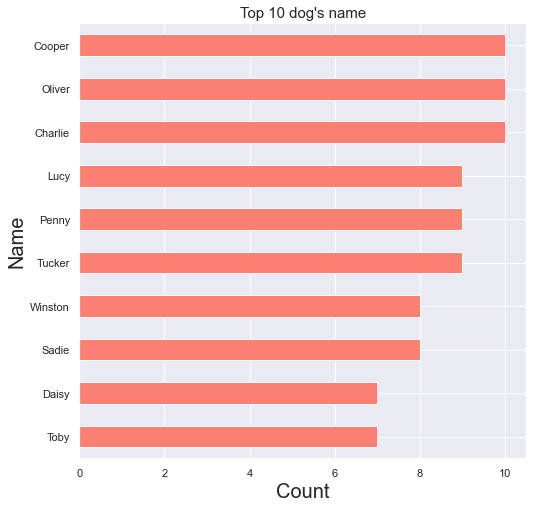

In [71]:
# Plot the barchart of the top dog's name
top_name = twitter_archive_master['name'].value_counts()
fig, axes = plt.subplots(figsize=(8, 8))
top_name.iloc[1:11].sort_values(ascending=True).plot(kind='barh', color="salmon")
axes.set_title("Top 10 dog's name", size=15)
axes.set_ylabel("Name", size=20)
axes.set_xlabel("Count", size=20);

The top 3 dog’s name are Cooper, Oliver, Charlie. These names tend to be a masculine dog’s name. Therefore, the dog’s owner tends to own a male dog rather than a female. The indicator states clearly on this chart by having only 3 out of 10 feminine dog’s names on the list (Lucy, Daisy, Sadie)

In [100]:
cooper_dog = twitter_archive_master.query('name == "Cooper"')
cooper_dog.query('favorite_count == favorite_count.max()')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
390,808001312164028416,2016-12-11 17:31:39+00:00,This is Cooper. He likes to stick his tongue o...,12.0,10.0,Cooper,NaN,3334,11897,1,Labrador Retriever,0.730959,True,Staffordshire Bullterrier,0.130726,True,American Staffordshire Terrier,0.028853,True,1.2


- Let's have a look on this Labrador Retriever whose name is Cooper and got the most favorites on his name. 
# ![title](Cooper_most_favorites.jpg)

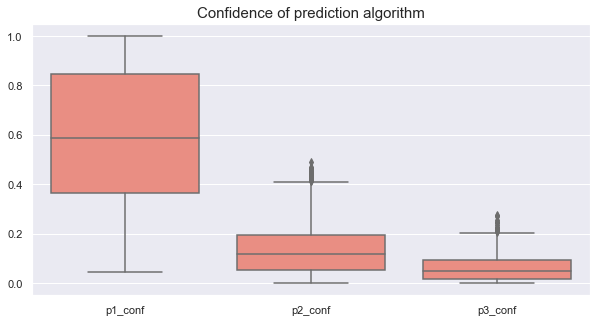

In [72]:
# Plot the boxplot of the distribution of prediction algorithm
fig, ax = plt.subplots(figsize=(10, 5))
axes = sns.boxplot(data=twitter_archive_master[['p1_conf', 'p2_conf', 'p3_conf']], color='salmon')
axes.set_title("Confidence of prediction algorithm", size=15);

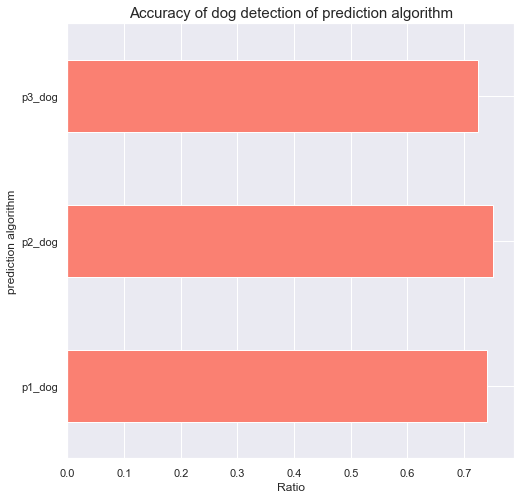

In [73]:
# Plot the barchart of the how accuracy of the prediction in regconize it is dog or not
fig, axes = plt.subplots(figsize=(8, 8))
twitter_archive_master[['p1_dog', 'p2_dog', 'p3_dog']].mean().plot(kind='barh', color="salmon")
axes.set_title("Accuracy of dog detection of prediction algorithm", size=15)
axes.set_ylabel("prediction algorithm", size=12)
axes.set_xlabel("Ratio", size=12);

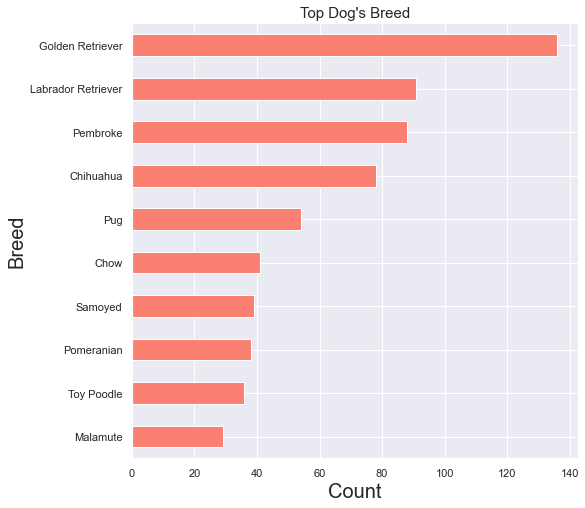

In [74]:
# Top 10 dog breed in WeRateDogs
top_breed = twitter_archive_master.p1.value_counts()
fig, axes = plt.subplots(figsize=(8, 8))
top_breed.iloc[0:10].sort_values(ascending=True).plot(kind='barh', color="salmon")
axes.set_title("Top Dog's Breed", size=15)
axes.set_ylabel("Breed", size=20)
axes.set_xlabel("Count", size=20);

In [102]:
golden_retriever = twitter_archive_master.query('p1 == "Golden Retriever"')
golden_retriever.query('favorite_count == favorite_count.max()')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
92,870374049280663552,2017-06-01 20:18:38+00:00,This is Zoey. She really likes the planet. Wou...,13.0,10.0,Zoey,NaN,22910,74132,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,0.032621,True,1.3


Let’s have a look who Zoey is and why a golden retriever like her receives such a highest number of favorites counts. She is such cute little dog, absolutely deserves the top favorite in golden retriever breed 😊
# ![title](golden_most_favorites.jpg)

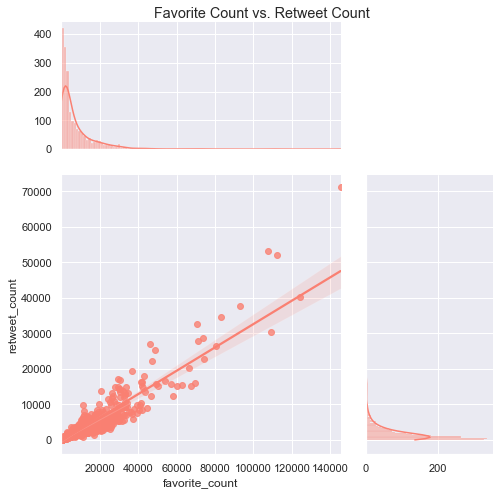

In [75]:
#Correlation betweet Favorite tweet & Retweet Count
axes = sns.jointplot(x='favorite_count', y='retweet_count',
                     data=twitter_archive_master, 
                     kind='reg', 
                     color='salmon', height=7, ratio=2, marginal_ticks=True)
axes.fig.suptitle('Favorite Count vs. Retweet Count')
axes.fig.subplots_adjust(top=0.95)

There is a strong correlation between retweet count and favorite count. Therefore, to increase the top traffic to the page, we should consider popping up some either high retweet or high favorite.

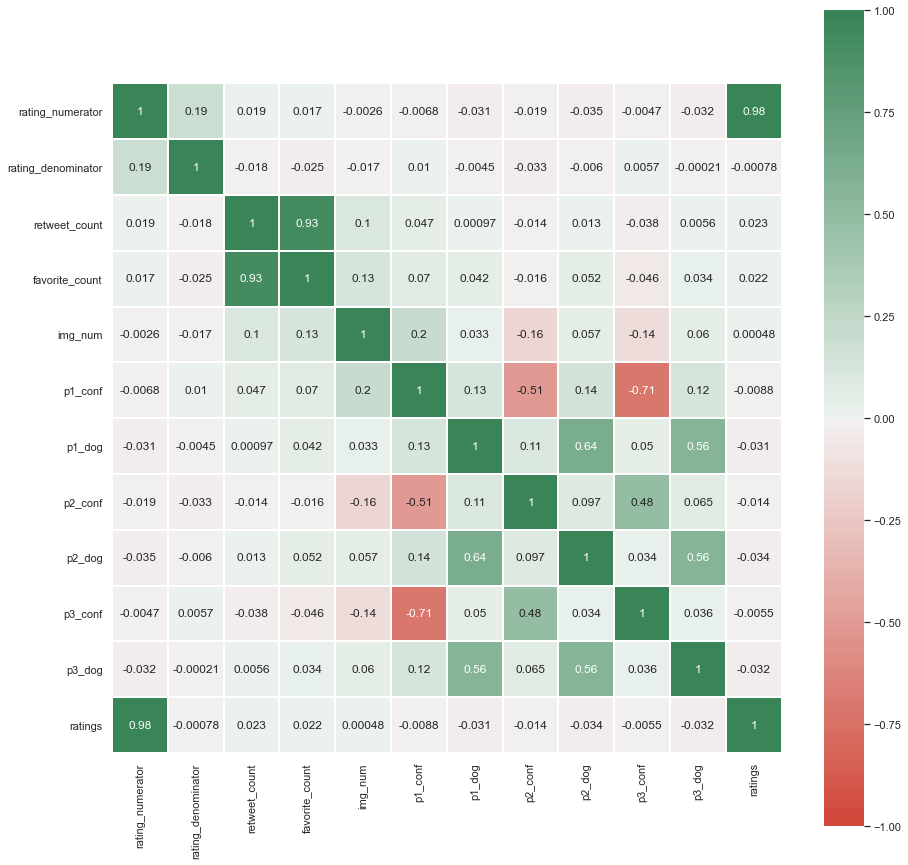

In [76]:
# Calculate the correlation matrix & plot the heatmap
fig, axes = plt.subplots(figsize=(15, 15))
corr = twitter_archive_master.corr()
axes = sns.heatmap(corr, annot=True, center=0,  linewidths=1, square=True, cmap=sns.diverging_palette(15, 500, n=100), vmin=-1, vmax=1)

The strong positive correlation (0.93) between retweet count & favorite count.